# Module 7

In [28]:
import pandas as pd
import numpy as np
filename = 'BTC-USD.csv'
btc_df = pd.read_csv(filename, header=0)
print(f'Read in {len(btc_df)} records from {filename}.')
btc_df.tail()

Read in 1828 records from BTC-USD.csv.


,Date,Open,High,Low,Close,Adj Close,Volume
1823,1/8/2022,41561.464840,42228.941410,40672.277340,41733.941410,41733.941410,2.806636e+10
1824,1/9/2022,41734.726560,42663.949220,41338.160160,41911.601560,41911.601560,2.129438e+10
1825,1/10/2022,41910.230470,42199.484380,39796.570310,41821.261720,41821.261720,3.210423e+10
1826,1/11/2022,41819.507813,43001.156250,41407.753906,42735.855469,42735.855469,2.632765e+10
1827,1/12/2022,42742.179688,44135.367188,42528.988281,43949.101563,43949.101563,3.349994e+10


## Lag function shifts down (or up) by a given number of rows

Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [29]:
btc_df.drop(columns=['Open', 'High', 'Low', 'Adj Close'], inplace=True)
btc_df['Close_lag1'] = btc_df.Close.shift(periods=1)
btc_df.head()

,Date,Close,Volume,Close_lag1
0,1/11/2017,777.757019,310928992.0,NaN
1,1/12/2017,804.833984,222326000.0,777.757019
2,1/13/2017,823.984009,168968000.0,804.833984
3,1/14/2017,818.411987,93063296.0,823.984009
4,1/15/2017,821.797974,71013600.0,818.411987


In [31]:
btc_df.dtypes
#btc_df.to_numeric()

Date           object
Close         float64
Volume        float64
Close_lag1    float64
dtype: object

In [33]:
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
btc_df.dtypes
btc_df.head()

,Date,Close,Volume,Close_lag1
0,2017-01-11,777.757019,310928992.0,NaN
1,2017-01-12,804.833984,222326000.0,777.757019
2,2017-01-13,823.984009,168968000.0,804.833984
3,2017-01-14,818.411987,93063296.0,823.984009
4,2017-01-15,821.797974,71013600.0,818.411987


# The lag makes calculating return easy

Looks like an equation.

Don't have to go row by row.

In [34]:
btc_df['ret_daily'] = btc_df.Close / btc_df.Close_lag1

## Percentages

If $r$ is the rate of return, the percentage is expressed

${(1 - r)} * 100$

In [35]:
btc_df['ret_pct'] = (btc_df['ret_daily'] - 1.0) * 100
btc_df.tail()

,Date,Close,Volume,Close_lag1,ret_daily,ret_pct
1823,2022-01-08,41733.941410,2.806636e+10,41557.902340,1.004236,0.423600
1824,2022-01-09,41911.601560,2.129438e+10,41733.941410,1.004257,0.425697
1825,2022-01-10,41821.261720,3.210423e+10,41911.601560,0.997845,-0.215549
1826,2022-01-11,42735.855469,2.632765e+10,41821.261720,1.021869,2.186911
1827,2022-01-12,43949.101563,3.349994e+10,42735.855469,1.028389,2.838942


## When is a year equal to 252 days?

That's how many trading days we have in a year.

Instead of shifting by 1, we can shift by 252 to get an annual return.

In [36]:
btc_df['Close_lag252'] = btc_df.Close.shift(periods=252)
btc_df['ret_annual'] = btc_df.Close / btc_df.Close_lag252
btc_df.head(270).tail(40)

,Date,Close,Volume,Close_lag1,ret_daily,ret_pct,Close_lag252,ret_annual
230,2017-08-29,4579.020020,2.486080e+09,4382.660156,1.044804,4.480381,NaN,NaN
231,2017-08-30,4565.299805,1.937850e+09,4579.020020,0.997004,-0.299632,NaN,NaN
232,2017-08-31,4703.390137,1.944930e+09,4565.299805,1.030248,3.024781,NaN,NaN
233,2017-09-01,4892.009766,2.599080e+09,4703.390137,1.040103,4.010291,NaN,NaN
234,2017-09-02,4578.770020,2.722140e+09,4892.009766,0.935969,-6.403089,NaN,NaN
235,2017-09-03,4582.959961,1.933190e+09,4578.770020,1.000915,0.091508,NaN,NaN
236,2017-09-04,4236.310059,2.987330e+09,4582.959961,0.924361,-7.563887,NaN,NaN
237,2017-09-05,4376.529785,2.697970e+09,4236.310059,1.033099,3.309950,NaN,NaN
238,2017-09-06,4597.120117,2.172100e+09,4376.529785,1.050403,5.040302,NaN,NaN
239,2017-09-07,4599.879883,1.844620e+09,4597.120117,1.000600,0.060032,NaN,NaN


## Add ln returns

Remember, $log_{10} (x) $ is different from natural log $ln(x)$.

$e^x$ and $ln(x)$ are inverses, so $e^{ln(x)}$ = $ln(e^x) = x$

Numpy has log10, log2, and log (our fav, natural logarithm)

Examples: https://www.geeksforgeeks.org/log-and-natural-logarithmic-value-of-a-column-in-pandas-python/

In [37]:
btc_df['ret_daily_ln'] = np.log(btc_df['ret_daily'])
btc_df.head()

,Date,Close,Volume,Close_lag1,ret_daily,ret_pct,Close_lag252,ret_annual,ret_daily_ln
0,2017-01-11,777.757019,310928992.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-12,804.833984,222326000.0,777.757019,1.034814,3.481417,NaN,NaN,0.034222
2,2017-01-13,823.984009,168968000.0,804.833984,1.023794,2.379376,NaN,NaN,0.023515
3,2017-01-14,818.411987,93063296.0,823.984009,0.993238,-0.676229,NaN,NaN,-0.006785
4,2017-01-15,821.797974,71013600.0,818.411987,1.004137,0.413726,NaN,NaN,0.004129


## Side bar about compounded interest

Let's think about simple interest: 5% annually.

If I started with $100...

* Year 0: $100
* Year 1: $105 ( = 100 * .05)
* Year 2: $110.25
* Year 3: $115.7625

In [38]:
# In Python
bal = 100
r = 0.05
t = 3
[bal*(1 + r)**i for i in range(t+1)]

[100.0, 105.0, 110.25, 115.76250000000002]

In [39]:
# What if we compound quarterly?
per = 4
[bal*(1 + r / per) ** i for i in range(t*per + 1)]

[100.0,
 101.25,
 102.515625,
 103.79707031249998,
 105.09453369140623,
 106.4082153625488,
 107.73831805458065,
 109.08504703026291,
 110.4486101181412,
 111.82921774461796,
 113.22708296642567,
 114.64242150350599,
 116.07545177229981]

In [40]:
# What if we compounded daily?
per = 250
l = [bal*(1 + r / per) ** i for i in range(t*per + 1)]
l[-10:]

[115.97276371344039,
 115.99595826618308,
 116.01915745783631,
 116.04236128932787,
 116.06556976158573,
 116.08878287553806,
 116.11200063211315,
 116.13522303223958,
 116.15845007684602,
 116.18168176686139]

## Here's why Euler's number is so handy...

If we had continuously compounding periods, we could use *e* (Euler's number) to get the final amount.

In [41]:
from math import exp
bal*exp(r*t)

116.1834242728283

## Natural logarithm goes the opposite direction

It gets us t (time). 

How long would it take you to double your money at 8%? 

$e^{rt} = 2$

$rt = ln 2$

$t = {ln 2} / r$

In [42]:
r = 0.08
t = np.log(2) / r
t

8.664339756999317

In [43]:
# Check my math with exponents
exp(r * t)

2.0

In [44]:
# Check my math in Python
bal = 100
r = 0.08
t = 9
per = 4
l = [bal*(1 + r / per) ** i for i in range(t*per + 1)]
l[-8:]

[177.58446902974066,
 181.13615841033547,
 184.7588815785422,
 188.45405921011303,
 192.2231403943153,
 196.0676032022016,
 199.98895526624565,
 203.98873437157056]

In [45]:
btc_df.describe()

,Close,Volume,Close_lag1,ret_daily,ret_pct,Close_lag252,ret_annual,ret_daily_ln
count,1828.000000,1.828000e+03,1827.000000,1827.000000,1827.000000,1576.000000,1576.000000,1827.000000
mean,15769.416661,2.128344e+10,15753.992641,1.003081,0.308146,10826.106921,2.403514,0.002208
std,17101.968664,2.118092e+10,17093.928334,0.041585,4.158469,12145.484927,2.417649,0.041870
min,777.757019,6.085170e+07,777.757019,0.628305,-37.169539,777.757019,0.346876,-0.464730
25%,5721.322388,4.664405e+09,5717.054932,0.984565,-1.543504,4536.942383,0.898448,-0.015555
50%,8723.863282,1.671208e+10,8723.786133,1.002322,0.232216,7899.024902,1.551324,0.002319
75%,14975.499760,3.281401e+10,14903.526860,1.021591,2.159124,10399.980472,3.021406,0.021361
max,67566.828130,3.509680e+11,67566.828130,1.252472,25.247169,63503.457030,17.438791,0.225119


# What is a normal distribution?

General: https://www.statisticshowto.com/probability-and-statistics/normal-distributions/

Following plot from: https://matplotlib.org/stable/gallery/pyplots/pyplot_text.htm

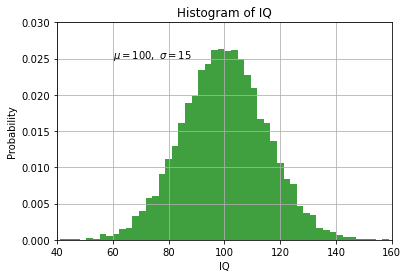

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(42)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('IQ')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

# Calculating volatility

Investopedia: https://www.investopedia.com/terms/v/volatility.asp

## NumPy
We can use std() on an array.
        

In [47]:
import numpy as np
prices = np.arange(1,11)

In [48]:
prices

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [49]:
prices.std()

2.8722813232690143

## Pandas

In [50]:
import pandas as pd
df = pd.DataFrame({'prices': prices})
df

,prices
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [51]:
df.std() # 3.02765

prices    3.02765
dtype: float64

In [52]:
df.std(ddof=0)

prices    2.872281
dtype: float64

## Back to BTC and its standard deviation.



In [53]:
btc_df['ret_pct'].describe()

count    1827.000000
mean        0.308146
std         4.158469
min       -37.169539
25%        -1.543504
50%         0.232216
75%         2.159124
max        25.247169
Name: ret_pct, dtype: float64

In [58]:
btc_sd = btc_df['ret_pct'].std(ddof=0)
btc_mean = btc_df['ret_pct'].mean()

In [62]:
print(f'68% of the daily returns for btc will be between {btc_mean - btc_sd:.4f}% and {btc_mean + btc_sd:.4f}%')

68% of the daily returns for btc will be between -3.8492% and 4.4655%


# Defining your own functions

Really basic: https://www.guru99.com/functions-in-python.html

More extensive: https://realpython.com/defining-your-own-python-function/#functions-in-python

## Functions in Python

Math: $y = ln(x)$

Python:
```
y = log(x)
```

Both take zero or more arguments manipulate them somehow, and return a value.

In [65]:
a = [2, 'hello', 3.14, np.pi]
a_len = len(a)  # argument of list a returns how many els in that list
print(f'list {a} is of length {a_len}') 

list [2, 'hello', 3.14, 3.141592653589793] is of length 4


## Abstraction and reusability

### Abstraction of functionality

Principal: Don't Repeat Yourself.

## Avoid code smell

Don't make me cut and paste.

## Namespaces

What happens in Vegas

In [67]:
def double(n):
    return n+n

double_me = 5
print(f'Twice {double_me} is {double(double_me)}')

print(double(21))

x = -3
y = double(x)
print(f'Twice {x} is {y}')

Twice 5 is 10
42
Twice -3 is -6


## What's wrong with cut and paste?

A nightmare to substitute a second bond's parameters.

In [74]:
annual_coupon_payment = 1000.0 * 0.06
n = 10 * 2
coupon_rate_per_payment = 1.0 + 0.04 / 2
coupon_pv = annual_coupon_payment / 0.04 * (1.0 - coupon_rate_per_payment ** (-n))
bond_pv = 1000.0 * coupon_rate_per_payment ** (-n)
print(coupon_pv + bond_pv)

1163.5143334459713


In [69]:
def calc_bond_price(face_value: float, coupon_rate: float, market_interest:float, years_to_maturity:int, payments_per_year:int=2) -> float:
    """
    Calculate the bond price.
    :param face_value: Bond face value, for example, 1000.00
    :param coupon_rate: Bond's declared coupon rate, e.g., .06 (which would be 6%)
    :param market_interest: Current market interest rate, e.g., 0.04 (for 4%)
    :param years_to_maturity: years to maturity, e.g., 10 (for 10 years)
    :param payments_per_year: payments per year, e.g., 2 (for semiannual)
    :return: a float of the bond price.
    """
    annual_coupon_payment = face_value * coupon_rate
    n = years_to_maturity * payments_per_year
    coupon_rate_per_payment = 1.0 + market_interest / payments_per_year
    coupon_pv = annual_coupon_payment / market_interest * (1.0 - coupon_rate_per_payment ** (-n))
    bond_pv = face_value * coupon_rate_per_payment ** (-n)
    return coupon_pv + bond_pv

bond_price = calc_bond_price(1000.0, 0.06, 0.04, 10, 2)
print(f'Bond price is ${bond_price:.2f}')

Bond price is $1163.51


In [75]:
# Imagine doing these three bonds with a cut and paste.

bond1 = (1000.0, 0.06, 0.04, 10, 2) # see last week's homework
bond2 = (1000.0, 0.10, 0.11359, 10, 2) # see https://dqydj.com/bond-pricing-calculator/
bond3 = (970.0, 40.0/970.0, 0.0375, 10, 2) # see https://www.brandonrenfro.com/bond-price-calculator/

bond_list = (bond1, bond2, bond3)
for fv, coup, mkt, years, compound_freq, in bond_list:
    price = calc_bond_price(face_value=fv, coupon_rate=coup, market_interest=mkt, years_to_maturity=years, payments_per_year=compound_freq)
    print(f'Calculated price: {price:.2f}')

Calculated price: 1163.51
Calculated price: 919.99
Calculated price: 1000.00


## A closer look at the function definition

```
def calc_bond_price(face_value: float, coupon_rate: float, market_interest:float, years_to_maturity:int, payments_per_year:int=2) -> float:
```

* def tells us the definition is coming
* calc_bond_price is the name
* can take 4 or 5 arguments (one has a default)
** face_value
** coupon_rate
** market_interest
** years_to_maturity
** payments_per_year (optional and defaults to 2 if missing)
* We can specify the argument types with annotations.
* We'll return a float.


## When calling the function, you can go by position or by keyword

I prefer keywords because they have saved me when I've altered the function.

In [76]:
calc_bond_price(1000.0, 0.06, 0.04, 10, 2)

1163.5143334459713

In [77]:
# Following goes with default of semiannual (payments_per_year=2)
calc_bond_price(face_value=1000.0, coupon_rate=0.06, market_interest=0.04, years_to_maturity=10)

1163.5143334459713

## Do we pass-by-value or pass-by-reference?

Or... what happens when my function changes an argument passed to it?

In [86]:
def increment(x: int) -> int:
    x += 1  # What happens in Vegas...
    return x
y = increment(3) # I'd better not change 3 !
print(3, y)

3 4


In [83]:
t = 3
y = increment(t)
print(t, y) # Relief that t was unchanged. Only x changed, but that was within increment.


3 4


In [85]:
def haircut(lst: list):
    off_the_top = lst.pop() # What happens in Vegas sometimes stay in Vegas.
    return off_the_top

a = [2, 'hello', 3.14, np.pi]
top = haircut(a)
print(f'Popped off {top}. List is: {a}')   # As a side effect, haircut changes lst passed to it.

Popped off 3.141592653589793. List is: [2, 'hello', 3.14]


## We passed something immutable (an int) to increment.

It didn't change. It acted like a pass-by-value.

## We passed something mutable (a list) to haircut.

It changed the list. It acted like a pass-by-reference.

## the return statement

This returns a value back to the caller.

It can be as simple as an int or as complex as you want it to be.

It's usually a single value, like an int or a None, but can be a tuple.

Return can be an early exit. 
* No need to keep on going if there's an error
* No need to keep on searching if you've found something.


## Docstring

Functions are first-class objects.

In [88]:
calc_bond_price

<function __main__.calc_bond_price(face_value: float, coupon_rate: float, market_interest: float, years_to_maturity: int, payments_per_year: int = 2) -> float>

In [91]:
print(calc_bond_price.__doc__)


    Calculate the bond price.
    :param face_value: Bond face value, for example, 1000.00
    :param coupon_rate: Bond's declared coupon rate, e.g., .06 (which would be 6%)
    :param market_interest: Current market interest rate, e.g., 0.04 (for 4%)
    :param years_to_maturity: years to maturity, e.g., 10 (for 10 years)
    :param payments_per_year: payments per year, e.g., 2 (for semiannual)
    :return: a float of the bond price.
    


# Exceptions

Try to make them as narrow as possible.

Recall our simple dictionary from Module 4.

Examples: https://realpython.com/python-exceptions/

Reference: https://docs.python.org/3/library/exceptions.html

In [92]:
# empty dictionary
d1 = {}
english = ['one', 'two', 'three', 'four']
french = ['un', 'deux', 'trois', 'quatre']
for eng, fr in zip(english, french):
    d1[eng] = fr
d1

{'one': 'un', 'two': 'deux', 'three': 'trois', 'four': 'quatre'}

In [95]:
# What if we try five? 
k = 'five'
d1[k] # KeyError

KeyError: 'five'

In [96]:
# Use try / except
try: 
    french = d1[k]
except KeyError:
    print(f'Key {k} was not found in the dictionary.')

Key five was not found in the dictionary.


## Different from a syntax error

These can only be found at runtime.

In [100]:
denoms = [10, 1, 0, 0.1]
for d in denoms:
    try:
        inv = 1.0 / d
        print(f'Inverse of {d} is {inv}')
    except ZeroDivisionError:
        print(f'Cannot calculate inverse of {d}')
        

Inverse of 10 is 0.1
Inverse of 1 is 1.0
Cannot calculate inverse of 0
Inverse of 0.1 is 10.0


## We can also raise our own exceptions

They are caught from specific to general.

Suppose we are passed a file, but can only handle CSV, XLS, and XLSX files.

Throw an exception if it's another type (say .parquet).

Throw a different exception if the file is not found.

Reference: https://docs.python.org/3/library/pathlib.html


In [105]:
from pathlib import Path
def handle_file(file: str) -> pd.DataFrame:
    f = Path(file)
    ext = f.suffix
    if ext not in ['.csv', '.xls', '.xlsx']:
        raise NotImplementedError(f'file extension {ext} is not handled yet.')
        return None
    if not f.exists():
        raise FileNotFoundError(f'Cannot find file {file}')
        return None
    # We found it!
    # ... process it here
    return f.name


In [106]:
files = ['BTC-USD.csv', 'b.parquet', 'cnotfound.xlsx']
for fn in files:
    try:
        f = handle_file(fn)
        print(f'Handled file {f}')
    except FileNotFoundError as e:
        print(e)
    except NotImplementedError as e:
        print(e)
    
        

Handled file BTC-USD.csv
file extension .parquet is not handled yet.
Cannot find file cnotfound.xlsx
